<a href="https://colab.research.google.com/github/AnneConstanceSIX/dotfiles/blob/master/classify_electrocardiograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

In [5]:
X = np.load('X.npy', allow_pickle=True).tolist()
y = np.load('y.npy', allow_pickle=True).tolist()

In [6]:
# Plot one ECG for each category in the dataset to see what an ECG looks like

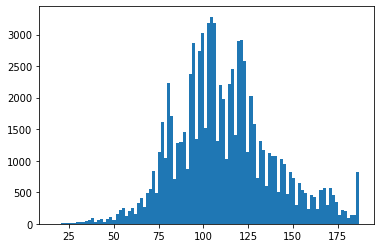

In [10]:
import matplotlib.pyplot as plt

plt.hist([len(x) for x in X], bins=100)
plt.show()

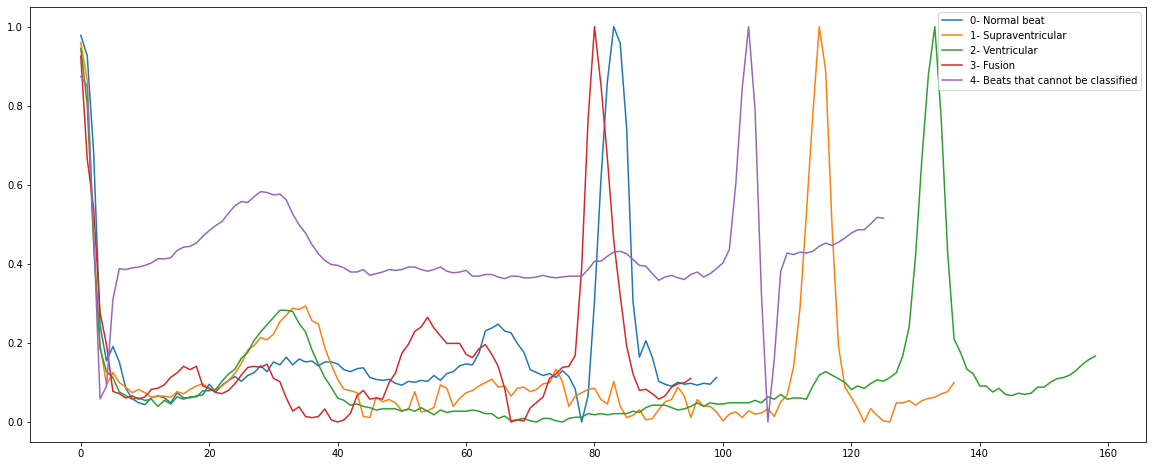

In [29]:
plt.figure(figsize=(20,8))
plt.plot(X[0], label ="0- Normal beat")
plt.plot(X[1], label="1- Supraventricular")
plt.plot(X[110], label="2- Ventricular")
plt.plot(X[3], label="3- Fusion")
plt.plot(X[8], label="4- Beats that cannot be classified")
plt.legend()
plt.show()

In [30]:
# Use the pad_sequences function on X directly (without extra arguments here), store the result in X_pad and print the first sequence.

from tensorflow.keras.preprocessing.sequence import pad_sequences
X_pad = pad_sequences(X, dtype='float32', padding='post', value=-1000)
X_pad = np.expand_dims(X_pad, 2)
assert(X_pad.shape == (87554, 187, 1))
X_pad.shape

(87554, 187, 1)

In [31]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y, num_classes=5, dtype='float32')

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y_cat, test_size=0.8)


In [48]:
# Write model that has the following layers:

# a Masking layer whose mask_value corresponds to the value you decided to pad your data with (it is probably a negative value as suggested) - this layer will simply tell the network not to take into account the computation artifact
# a SimpleRNN layer with 10 units and the tanh as the activation function
# a dense layer with 20 units
# a last layer

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Masking(mask_value=-1000))
model.add(layers.SimpleRNN(units=10, activation='tanh')) 
model.add(layers.Dense(20, activation="relu"))

model.add(layers.Dense(5, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [50]:
# Compile your model and train it - a very small patience equal to 2 should be sufficient. This is because you have a lot of sequences and thus, many optimizations per epochs. 

In [52]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=2, restore_best_weights=True)

model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          validation_split=0.2,
          callbacks=[es],
          verbose=1)

Epoch 1/100
438/438 [==============================] - 93s 211ms/step - loss: 0.6514 - accuracy: 0.8306 - val_loss: 0.6183 - val_accuracy: 0.8415
Epoch 2/100
438/438 [==============================] - 92s 211ms/step - loss: 0.6507 - accuracy: 0.8306 - val_loss: 0.6195 - val_accuracy: 0.8415
Epoch 3/100
438/438 [==============================] - 92s 211ms/step - loss: 0.6510 - accuracy: 0.8306 - val_loss: 0.6193 - val_accuracy: 0.8415


In [53]:
print(model.evaluate(X_test, y_test, verbose=0))

[0.6622177958488464, 0.8264662027359009]


In [54]:
#Repeat the last steps by using a `LSTM` instead of a `SimpleRNN`. If you feel like it, you can change the neural network parameters to improve the accuracy. Evaluate your accuracy on the test set.

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Masking(mask_value=-1000))
model.add(layers.LSTM(units=10, activation='tanh')) 
model.add(layers.Dense(30, activation="relu"))
model.add(layers.Dense(15, activation="relu"))

model.add(layers.Dense(5, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [56]:
es = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/100
438/438 [==============================] - 15s 15ms/step - loss: 0.8850 - accuracy: 0.8138 - val_loss: 0.6192 - val_accuracy: 0.8415
Epoch 2/100
438/438 [==============================] - 6s 13ms/step - loss: 0.6474 - accuracy: 0.8327 - val_loss: 0.6188 - val_accuracy: 0.8415
Epoch 3/100
438/438 [==============================] - 6s 13ms/step - loss: 0.6457 - accuracy: 0.8324 - val_loss: 0.6197 - val_accuracy: 0.8415
Epoch 4/100
438/438 [==============================] - 6s 13ms/step - loss: 0.6494 - accuracy: 0.8315 - val_loss: 0.6226 - val_accuracy: 0.8415
Epoch 5/100
438/438 [==============================] - 6s 13ms/step - loss: 0.6619 - accuracy: 0.8271 - val_loss: 0.6185 - val_accuracy: 0.8415
Epoch 6/100
438/438 [==============================] - 6s 13ms/step - loss: 0.6429 - accuracy: 0.8346 - val_loss: 0.6224 - val_accuracy: 0.8415
Epoch 7/100
438/438 [==============================] - 6s 13ms/step - loss: 0.6434 - accuracy: 0.8341 - val_loss: 0.6188 - val_accuracy

In [57]:
print(model.evaluate(X_test, y_test, verbose=0))


[0.6620704531669617, 0.8264662027359009]


In [58]:
#  What about a GRU?

model = Sequential()
model.add(layers.Masking(mask_value=-1000))
model.add(layers.GRU(units=10, activation='tanh')) 
model.add(layers.Dense(30, activation="relu"))
model.add(layers.Dense(15, activation="relu"))

model.add(layers.Dense(5, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [59]:
es = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          validation_split=0.2,
          callbacks=[es])

Epoch 1/100
438/438 [==============================] - 177s 402ms/step - loss: 0.9280 - accuracy: 0.7789 - val_loss: 0.6304 - val_accuracy: 0.8415
Epoch 2/100
438/438 [==============================] - 175s 399ms/step - loss: 0.6795 - accuracy: 0.8207 - val_loss: 0.6200 - val_accuracy: 0.8415
Epoch 3/100
438/438 [==============================] - 175s 400ms/step - loss: 0.6575 - accuracy: 0.8285 - val_loss: 0.6217 - val_accuracy: 0.8415
Epoch 4/100
438/438 [==============================] - 173s 396ms/step - loss: 0.6486 - accuracy: 0.8309 - val_loss: 0.6200 - val_accuracy: 0.8415
Epoch 5/100
438/438 [==============================] - 172s 393ms/step - loss: 0.6394 - accuracy: 0.8350 - val_loss: 0.6183 - val_accuracy: 0.8415
Epoch 6/100
438/438 [==============================] - 172s 393ms/step - loss: 0.6531 - accuracy: 0.8290 - val_loss: 0.6202 - val_accuracy: 0.8415
Epoch 7/100
438/438 [==============================] - 173s 395ms/step - loss: 0.6445 - accuracy: 0.8336 - val_loss: 0

In [60]:
print(model.evaluate(X_test, y_test, verbose=0))

[0.6617861390113831, 0.8264662027359009]


In [85]:
y_predict = X_train[:,5:10,0]

y_train.shape, y_predict.shape

((17510, 5), (17510, 5))

In [86]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, y_predict)

0.31944972

In [ ]:
b